In [2]:
from qiskit import QuantumCircuit,QuantumRegister,ClassicalRegister,transpile
from qiskit_aer import Aer,aer_simulator,qasm_simulator,AerSimulator,statevector_simulator
from qiskit.visualization import *
from matplotlib import pyplot
from qiskit.circuit.library import GroverOperator,grover_operator,boolean_logic

import time as t


In [3]:
#NOT GATE
def NOT(inp):
    qc=QuantumCircuit(1,1)
    qc.reset(range(0))
    if inp=='1':
        qc.x(0)
    qc.barrier()
    qc.x(0)
    qc.barrier()
    qc.measure(0,0)
    start_time = t.time()
    backend = Aer.get_backend('aer_simulator')
    job = backend.run(qc, shots=1, memory=True)
    output=job.result().get_memory()[0]
    end_time = t.time()

    execution_time = end_time - start_time
    return qc, output, execution_time
for inp in ['0','1']:
    qc,output,execution_time=NOT(inp)
    print("not with input",inp,"gives output",output)
    print(f"Execution Time: {execution_time:.6f} seconds")
    display(qc.draw())
    print('\n')


not with input 0 gives output 1
Execution Time: 0.007881 seconds


░ ┌───┐ ░ ┌─┐
  q: ─░─┤ X ├─░─┤M├
      ░ └───┘ ░ └╥┘
c: 1/════════════╩═
                 0



not with input 1 gives output 0
Execution Time: 0.003154 seconds


┌───┐ ░ ┌───┐ ░ ┌─┐
  q: ┤ X ├─░─┤ X ├─░─┤M├
     └───┘ ░ └───┘ ░ └╥┘
c: 1/═════════════════╩═
                      0

In [4]:
#OR GATE
def OR(inp1,inp2):
    qc=QuantumCircuit(3,1)
    qc.reset(range(2))
    if inp1=='1':
        qc.x(0)
    if inp2=='1':
        qc.x(1)
    qc.barrier()
    qc.cx(1,2)
    qc.cx(0,1)
    qc.ccx(0,1,2)
    qc.barrier()
    qc.measure(2,0)
    start=t.time()
    backend = Aer.get_backend('aer_simulator')
    job = backend.run(qc, shots=1, memory=True)
    output=job.result().get_memory()[0]
    end=t.time()
    exe=end-start
    return qc,output,exe
for inp1 in ['0','1']:
    for inp2 in ['0','1']:
        qc,output,exe=OR(inp1,inp2)
        print("or with input",inp1,inp2,"gives output",output)
        print(f"Execution Time: {exe:.6f} seconds")
        display(qc.draw())
        print('\n')


or with input 0 0 gives output 0
Execution Time: 0.003492 seconds


░                 ░    
q_0: ─|0>──░────────■────■───░────
           ░      ┌─┴─┐  │   ░    
q_1: ─|0>──░───■──┤ X ├──■───░────
           ░ ┌─┴─┐└───┘┌─┴─┐ ░ ┌─┐
q_2: ──────░─┤ X ├─────┤ X ├─░─┤M├
           ░ └───┘     └───┘ ░ └╥┘
c: 1/═══════════════════════════╩═
                                0



or with input 0 1 gives output 1
Execution Time: 0.000000 seconds


░                 ░    
q_0: ─|0>───────░────────■────■───░────
          ┌───┐ ░      ┌─┴─┐  │   ░    
q_1: ─|0>─┤ X ├─░───■──┤ X ├──■───░────
          └───┘ ░ ┌─┴─┐└───┘┌─┴─┐ ░ ┌─┐
q_2: ───────────░─┤ X ├─────┤ X ├─░─┤M├
                ░ └───┘     └───┘ ░ └╥┘
c: 1/════════════════════════════════╩═
                                     0



or with input 1 0 gives output 1
Execution Time: 0.001289 seconds


┌───┐ ░                 ░    
q_0: ─|0>─┤ X ├─░────────■────■───░────
          └───┘ ░      ┌─┴─┐  │   ░    
q_1: ─|0>───────░───■──┤ X ├──■───░────
                ░ ┌─┴─┐└───┘┌─┴─┐ ░ ┌─┐
q_2: ───────────░─┤ X ├─────┤ X ├─░─┤M├
                ░ └───┘     └───┘ ░ └╥┘
c: 1/════════════════════════════════╩═
                                     0



or with input 1 1 gives output 1
Execution Time: 0.000849 seconds


┌───┐ ░                 ░    
q_0: ─|0>─┤ X ├─░────────■────■───░────
          ├───┤ ░      ┌─┴─┐  │   ░    
q_1: ─|0>─┤ X ├─░───■──┤ X ├──■───░────
          └───┘ ░ ┌─┴─┐└───┘┌─┴─┐ ░ ┌─┐
q_2: ───────────░─┤ X ├─────┤ X ├─░─┤M├
                ░ └───┘     └───┘ ░ └╥┘
c: 1/════════════════════════════════╩═
                                     0

In [5]:
#AND GATE
def AND(inp1,inp2):
    qc=QuantumCircuit(3,1)
    qc.reset(range(2))
    if inp1=='1':
        qc.x(0)
    if inp2=='1':
        qc.x(1)
    qc.barrier()
    qc.ccx(0,1,2)
    qc.barrier()
    qc.measure(2,0)
    start=t.time()
    backend = Aer.get_backend('aer_simulator')
    job = backend.run(qc, shots=1, memory=True)
    output=job.result().get_memory()[0]
    end=t.time()
    exe=end-start
    return qc,output,exe
for inp1 in ['0','1']:
    for inp2 in ['0','1']:
        qc,output,exe=AND(inp1,inp2)
        print("and with input",inp1,inp2,"gives output",output)
        print(f"Execution Time: {exe:.6f} seconds")
        display(qc.draw())
        print('\n')


and with input 0 0 gives output 0
Execution Time: 0.001330 seconds


░       ░    
q_0: ─|0>──░───■───░────
           ░   │   ░    
q_1: ─|0>──░───■───░────
           ░ ┌─┴─┐ ░ ┌─┐
q_2: ──────░─┤ X ├─░─┤M├
           ░ └───┘ ░ └╥┘
c: 1/═════════════════╩═
                      0



and with input 0 1 gives output 0
Execution Time: 0.001017 seconds


░       ░    
q_0: ─|0>───────░───■───░────
          ┌───┐ ░   │   ░    
q_1: ─|0>─┤ X ├─░───■───░────
          └───┘ ░ ┌─┴─┐ ░ ┌─┐
q_2: ───────────░─┤ X ├─░─┤M├
                ░ └───┘ ░ └╥┘
c: 1/══════════════════════╩═
                           0



and with input 1 0 gives output 0
Execution Time: 0.001268 seconds


┌───┐ ░       ░    
q_0: ─|0>─┤ X ├─░───■───░────
          └───┘ ░   │   ░    
q_1: ─|0>───────░───■───░────
                ░ ┌─┴─┐ ░ ┌─┐
q_2: ───────────░─┤ X ├─░─┤M├
                ░ └───┘ ░ └╥┘
c: 1/══════════════════════╩═
                           0



and with input 1 1 gives output 1
Execution Time: 0.001049 seconds


┌───┐ ░       ░    
q_0: ─|0>─┤ X ├─░───■───░────
          ├───┤ ░   │   ░    
q_1: ─|0>─┤ X ├─░───■───░────
          └───┘ ░ ┌─┴─┐ ░ ┌─┐
q_2: ───────────░─┤ X ├─░─┤M├
                ░ └───┘ ░ └╥┘
c: 1/══════════════════════╩═
                           0

In [6]:
#XOR GATE
def XOR(inp1,inp2):
    qc=QuantumCircuit(3,1)
    qc.reset(range(2))
    if inp1=='1':
        qc.x(0)
    if inp2=='1':
        qc.x(0)
    qc.barrier()
    qc.cx(0,2)
    qc.cx(1,2)
    
    qc.barrier()
    qc.measure(2,0)
    start=t.time()
    backend = Aer.get_backend('aer_simulator')
    job = backend.run(qc, shots=1, memory=True)
    output=job.result().get_memory()[0]
    end=t.time()
    exe=end-start
    return qc,output,exe
for inp1 in ['0','1']:
    for inp2 in ['0','1']:
        qc,output,exe=XOR(inp1,inp2)
        print("xor with input",inp1,inp2,"gives output",output)
        print(f"Execution Time: {exe:.6f} seconds")
        display(qc.draw())
        print('\n')


xor with input 0 0 gives output 0
Execution Time: 0.001127 seconds


░            ░    
q_0: ─|0>──░───■────────░────
           ░   │        ░    
q_1: ─|0>──░───┼────■───░────
           ░ ┌─┴─┐┌─┴─┐ ░ ┌─┐
q_2: ──────░─┤ X ├┤ X ├─░─┤M├
           ░ └───┘└───┘ ░ └╥┘
c: 1/══════════════════════╩═
                           0



xor with input 0 1 gives output 1
Execution Time: 0.001757 seconds


┌───┐ ░            ░    
q_0: ─|0>─┤ X ├─░───■────────░────
          └───┘ ░   │        ░    
q_1: ─|0>───────░───┼────■───░────
                ░ ┌─┴─┐┌─┴─┐ ░ ┌─┐
q_2: ───────────░─┤ X ├┤ X ├─░─┤M├
                ░ └───┘└───┘ ░ └╥┘
c: 1/═══════════════════════════╩═
                                0



xor with input 1 0 gives output 1
Execution Time: 0.000000 seconds


┌───┐ ░            ░    
q_0: ─|0>─┤ X ├─░───■────────░────
          └───┘ ░   │        ░    
q_1: ─|0>───────░───┼────■───░────
                ░ ┌─┴─┐┌─┴─┐ ░ ┌─┐
q_2: ───────────░─┤ X ├┤ X ├─░─┤M├
                ░ └───┘└───┘ ░ └╥┘
c: 1/═══════════════════════════╩═
                                0



xor with input 1 1 gives output 0
Execution Time: 0.000000 seconds


┌───┐┌───┐ ░            ░    
q_0: ─|0>─┤ X ├┤ X ├─░───■────────░────
          └───┘└───┘ ░   │        ░    
q_1: ─|0>────────────░───┼────■───░────
                     ░ ┌─┴─┐┌─┴─┐ ░ ┌─┐
q_2: ────────────────░─┤ X ├┤ X ├─░─┤M├
                     ░ └───┘└───┘ ░ └╥┘
c: 1/════════════════════════════════╩═
                                     0

In [7]:
#NAND GATE
def NAND(inp1,inp2):
    qc=QuantumCircuit(3,1)
    qc.reset(range(3))
    if inp1=='1':
        qc.x(0)
    if inp2=='1':
        qc.x(1)
    qc.barrier()
    qc.ccx(0,1,2)
    qc.x([2])
    qc.barrier()
    qc.measure(2,0)
    backend = Aer.get_backend('aer_simulator')
    job = backend.run(qc, shots=1, memory=True)
    output=job.result().get_memory()[0]
    return qc,output
for inp1 in ['0','1']:
    for inp2 in ['0','1']:
        qc,output=NAND(inp1,inp2)
        print("nand with input",inp1,inp2,"gives output",output)
        display(qc.draw())
        print('\n')


nand with input 0 0 gives output 1


░            ░    
q_0: ─|0>──░───■────────░────
           ░   │        ░    
q_1: ─|0>──░───■────────░────
           ░ ┌─┴─┐┌───┐ ░ ┌─┐
q_2: ─|0>──░─┤ X ├┤ X ├─░─┤M├
           ░ └───┘└───┘ ░ └╥┘
c: 1/══════════════════════╩═
                           0



nand with input 0 1 gives output 1


░            ░    
q_0: ─|0>───────░───■────────░────
          ┌───┐ ░   │        ░    
q_1: ─|0>─┤ X ├─░───■────────░────
          └───┘ ░ ┌─┴─┐┌───┐ ░ ┌─┐
q_2: ─|0>───────░─┤ X ├┤ X ├─░─┤M├
                ░ └───┘└───┘ ░ └╥┘
c: 1/═══════════════════════════╩═
                                0



nand with input 1 0 gives output 1


┌───┐ ░            ░    
q_0: ─|0>─┤ X ├─░───■────────░────
          └───┘ ░   │        ░    
q_1: ─|0>───────░───■────────░────
                ░ ┌─┴─┐┌───┐ ░ ┌─┐
q_2: ─|0>───────░─┤ X ├┤ X ├─░─┤M├
                ░ └───┘└───┘ ░ └╥┘
c: 1/═══════════════════════════╩═
                                0



nand with input 1 1 gives output 0


┌───┐ ░            ░    
q_0: ─|0>─┤ X ├─░───■────────░────
          ├───┤ ░   │        ░    
q_1: ─|0>─┤ X ├─░───■────────░────
          └───┘ ░ ┌─┴─┐┌───┐ ░ ┌─┐
q_2: ─|0>───────░─┤ X ├┤ X ├─░─┤M├
                ░ └───┘└───┘ ░ └╥┘
c: 1/═══════════════════════════╩═
                                0

In [8]:
#HALF_ADDER
def halfadder(inp1,inp2):
    qc=QuantumCircuit(4,2)
    qc.reset(range(4))
    if inp1=='1':
        qc.x(0)
    if inp2=='1':
        qc.x(1)
    qc.barrier()
    qc.cx(0,2)
    qc.cx(1,2)
    qc.barrier()
    qc.ccx(0,1,3)
    qc.barrier()
    qc.measure(2,0)
    qc.measure(3,1)
    backend = Aer.get_backend('aer_simulator')
    job = backend.run(qc, shots=1, memory=True)
    output=job.result().get_memory()[0]
    return qc,output
for inp1 in ['0','1']:
    for inp2 in ['0','1']:
        qc,output=halfadder(inp1,inp2)
        print("halfadder with input",inp1,inp2,"gives output",output)
        display(qc.draw())
        print('\n')


halfadder with input 0 0 gives output 00


░            ░       ░       
q_0: ─|0>──░───■────────░───■───░───────
           ░   │        ░   │   ░       
q_1: ─|0>──░───┼────■───░───■───░───────
           ░ ┌─┴─┐┌─┴─┐ ░   │   ░ ┌─┐   
q_2: ─|0>──░─┤ X ├┤ X ├─░───┼───░─┤M├───
           ░ └───┘└───┘ ░ ┌─┴─┐ ░ └╥┘┌─┐
q_3: ─|0>──░────────────░─┤ X ├─░──╫─┤M├
           ░            ░ └───┘ ░  ║ └╥┘
c: 2/══════════════════════════════╩══╩═
                                   0  1



halfadder with input 0 1 gives output 01


░            ░       ░       
q_0: ─|0>───────░───■────────░───■───░───────
          ┌───┐ ░   │        ░   │   ░       
q_1: ─|0>─┤ X ├─░───┼────■───░───■───░───────
          └───┘ ░ ┌─┴─┐┌─┴─┐ ░   │   ░ ┌─┐   
q_2: ─|0>───────░─┤ X ├┤ X ├─░───┼───░─┤M├───
                ░ └───┘└───┘ ░ ┌─┴─┐ ░ └╥┘┌─┐
q_3: ─|0>───────░────────────░─┤ X ├─░──╫─┤M├
                ░            ░ └───┘ ░  ║ └╥┘
c: 2/═══════════════════════════════════╩══╩═
                                        0  1



halfadder with input 1 0 gives output 01


┌───┐ ░            ░       ░       
q_0: ─|0>─┤ X ├─░───■────────░───■───░───────
          └───┘ ░   │        ░   │   ░       
q_1: ─|0>───────░───┼────■───░───■───░───────
                ░ ┌─┴─┐┌─┴─┐ ░   │   ░ ┌─┐   
q_2: ─|0>───────░─┤ X ├┤ X ├─░───┼───░─┤M├───
                ░ └───┘└───┘ ░ ┌─┴─┐ ░ └╥┘┌─┐
q_3: ─|0>───────░────────────░─┤ X ├─░──╫─┤M├
                ░            ░ └───┘ ░  ║ └╥┘
c: 2/═══════════════════════════════════╩══╩═
                                        0  1



halfadder with input 1 1 gives output 10


┌───┐ ░            ░       ░       
q_0: ─|0>─┤ X ├─░───■────────░───■───░───────
          ├───┤ ░   │        ░   │   ░       
q_1: ─|0>─┤ X ├─░───┼────■───░───■───░───────
          └───┘ ░ ┌─┴─┐┌─┴─┐ ░   │   ░ ┌─┐   
q_2: ─|0>───────░─┤ X ├┤ X ├─░───┼───░─┤M├───
                ░ └───┘└───┘ ░ ┌─┴─┐ ░ └╥┘┌─┐
q_3: ─|0>───────░────────────░─┤ X ├─░──╫─┤M├
                ░            ░ └───┘ ░  ║ └╥┘
c: 2/═══════════════════════════════════╩══╩═
                                        0  1

In [9]:
#FULL_ADDER
def fulladder(inp1,inp2,inp3):
    qc=QuantumCircuit(8,2)
    qc.reset(range(8))
    if inp1=='1':
        qc.x(0)
    if inp2=='1':
        qc.x(1)
    if inp3=='1':
        qc.x(3)
    qc.barrier()
    qc.cx(0,2)
    qc.cx(1,2)
    qc.barrier()
    qc.cx(2,4)
    qc.cx(3,4)
    qc.barrier()
    qc.ccx(2,3,5)
    qc.barrier()
    qc.ccx(0,1,6)
    
    qc.barrier()
    qc.cx(6,7)
    qc.cx(5,6)
    qc.ccx(5,6,7)
    qc.barrier()
    qc.measure(4,0)
    qc.measure(7,1)
    backend = Aer.get_backend('aer_simulator')
    job = backend.run(qc, shots=1, memory=True)
    output=job.result().get_memory()[0]
    return qc,output
for inp1 in ['0','1']:
    for inp2 in ['0','1']:
        for inp3 in ['0','1']:
            qc,output=fulladder(inp1,inp2,inp3)
            print("fulladder with input",inp1,inp2,inp3,"gives output",output)
            display(qc.draw())
            print('\n')

fulladder with input 0 0 0 gives output 00


░            ░            ░       ░       ░                 ░       
q_0: ─|0>──░───■────────░────────────░───────░───■───░─────────────────░───────
           ░   │        ░            ░       ░   │   ░                 ░       
q_1: ─|0>──░───┼────■───░────────────░───────░───■───░─────────────────░───────
           ░ ┌─┴─┐┌─┴─┐ ░            ░       ░   │   ░                 ░       
q_2: ─|0>──░─┤ X ├┤ X ├─░───■────────░───■───░───┼───░─────────────────░───────
           ░ └───┘└───┘ ░   │        ░   │   ░   │   ░                 ░       
q_3: ─|0>──░────────────░───┼────■───░───■───░───┼───░─────────────────░───────
           ░            ░ ┌─┴─┐┌─┴─┐ ░   │   ░   │   ░                 ░ ┌─┐   
q_4: ─|0>──░────────────░─┤ X ├┤ X ├─░───┼───░───┼───░─────────────────░─┤M├───
           ░            ░ └───┘└───┘ ░ ┌─┴─┐ ░   │   ░                 ░ └╥┘   
q_5: ─|0>──░────────────░────────────░─┤ X ├─░───┼───░────────■────■───░──╫────
           ░            ░            ░ └───┘ ░ ┌─┴─┐ ░      ┌─┴─┐  │   ░  ║    
q_6: ─|0>──░────────────░────────────░───────░─┤ X ├─░───■──┤ X ├──■───░──╫────
           ░            ░            ░       ░ └───┘ ░ ┌─┴─┐└───┘┌─┴─┐ ░  ║ ┌─┐
q_7: ─|0>──░────────────░────────────░───────░───────░─┤ X ├─────┤ X ├─░──╫─┤M├
           ░            ░            ░       ░       ░ └───┘     └───┘ ░  ║ └╥┘
c: 2/═════════════════════════════════════════════════════════════════════╩══╩═
                                                                          0  1



fulladder with input 0 0 1 gives output 01


░            ░            ░       ░       ░                 ░ »
q_0: ─|0>───────░───■────────░────────────░───────░───■───░─────────────────░─»
                ░   │        ░            ░       ░   │   ░                 ░ »
q_1: ─|0>───────░───┼────■───░────────────░───────░───■───░─────────────────░─»
                ░ ┌─┴─┐┌─┴─┐ ░            ░       ░   │   ░                 ░ »
q_2: ─|0>───────░─┤ X ├┤ X ├─░───■────────░───■───░───┼───░─────────────────░─»
          ┌───┐ ░ └───┘└───┘ ░   │        ░   │   ░   │   ░                 ░ »
q_3: ─|0>─┤ X ├─░────────────░───┼────■───░───■───░───┼───░─────────────────░─»
          └───┘ ░            ░ ┌─┴─┐┌─┴─┐ ░   │   ░   │   ░                 ░ »
q_4: ─|0>───────░────────────░─┤ X ├┤ X ├─░───┼───░───┼───░─────────────────░─»
                ░            ░ └───┘└───┘ ░ ┌─┴─┐ ░   │   ░                 ░ »
q_5: ─|0>───────░────────────░────────────░─┤ X ├─░───┼───░────────■────■───░─»
                ░            ░            ░ └───┘ ░ ┌─┴─┐ ░      ┌─┴─┐  │   ░ »
q_6: ─|0>───────░────────────░────────────░───────░─┤ X ├─░───■──┤ X ├──■───░─»
                ░            ░            ░       ░ └───┘ ░ ┌─┴─┐└───┘┌─┴─┐ ░ »
q_7: ─|0>───────░────────────░────────────░───────░───────░─┤ X ├─────┤ X ├─░─»
                ░            ░            ░       ░       ░ └───┘     └───┘ ░ »
c: 2/═════════════════════════════════════════════════════════════════════════»
                                                                              »
«           
«q_0: ──────
«           
«q_1: ──────
«           
«q_2: ──────
«           
«q_3: ──────
«     ┌─┐   
«q_4: ┤M├───
«     └╥┘   
«q_5: ─╫────
«      ║    
«q_6: ─╫────
«      ║ ┌─┐
«q_7: ─╫─┤M├
«      ║ └╥┘
«c: 2/═╩══╩═
«      0  1



fulladder with input 0 1 0 gives output 01


░            ░            ░       ░       ░                 ░ »
q_0: ─|0>───────░───■────────░────────────░───────░───■───░─────────────────░─»
          ┌───┐ ░   │        ░            ░       ░   │   ░                 ░ »
q_1: ─|0>─┤ X ├─░───┼────■───░────────────░───────░───■───░─────────────────░─»
          └───┘ ░ ┌─┴─┐┌─┴─┐ ░            ░       ░   │   ░                 ░ »
q_2: ─|0>───────░─┤ X ├┤ X ├─░───■────────░───■───░───┼───░─────────────────░─»
                ░ └───┘└───┘ ░   │        ░   │   ░   │   ░                 ░ »
q_3: ─|0>───────░────────────░───┼────■───░───■───░───┼───░─────────────────░─»
                ░            ░ ┌─┴─┐┌─┴─┐ ░   │   ░   │   ░                 ░ »
q_4: ─|0>───────░────────────░─┤ X ├┤ X ├─░───┼───░───┼───░─────────────────░─»
                ░            ░ └───┘└───┘ ░ ┌─┴─┐ ░   │   ░                 ░ »
q_5: ─|0>───────░────────────░────────────░─┤ X ├─░───┼───░────────■────■───░─»
                ░            ░            ░ └───┘ ░ ┌─┴─┐ ░      ┌─┴─┐  │   ░ »
q_6: ─|0>───────░────────────░────────────░───────░─┤ X ├─░───■──┤ X ├──■───░─»
                ░            ░            ░       ░ └───┘ ░ ┌─┴─┐└───┘┌─┴─┐ ░ »
q_7: ─|0>───────░────────────░────────────░───────░───────░─┤ X ├─────┤ X ├─░─»
                ░            ░            ░       ░       ░ └───┘     └───┘ ░ »
c: 2/═════════════════════════════════════════════════════════════════════════»
                                                                              »
«           
«q_0: ──────
«           
«q_1: ──────
«           
«q_2: ──────
«           
«q_3: ──────
«     ┌─┐   
«q_4: ┤M├───
«     └╥┘   
«q_5: ─╫────
«      ║    
«q_6: ─╫────
«      ║ ┌─┐
«q_7: ─╫─┤M├
«      ║ └╥┘
«c: 2/═╩══╩═
«      0  1



fulladder with input 0 1 1 gives output 10


░            ░            ░       ░       ░                 ░ »
q_0: ─|0>───────░───■────────░────────────░───────░───■───░─────────────────░─»
          ┌───┐ ░   │        ░            ░       ░   │   ░                 ░ »
q_1: ─|0>─┤ X ├─░───┼────■───░────────────░───────░───■───░─────────────────░─»
          └───┘ ░ ┌─┴─┐┌─┴─┐ ░            ░       ░   │   ░                 ░ »
q_2: ─|0>───────░─┤ X ├┤ X ├─░───■────────░───■───░───┼───░─────────────────░─»
          ┌───┐ ░ └───┘└───┘ ░   │        ░   │   ░   │   ░                 ░ »
q_3: ─|0>─┤ X ├─░────────────░───┼────■───░───■───░───┼───░─────────────────░─»
          └───┘ ░            ░ ┌─┴─┐┌─┴─┐ ░   │   ░   │   ░                 ░ »
q_4: ─|0>───────░────────────░─┤ X ├┤ X ├─░───┼───░───┼───░─────────────────░─»
                ░            ░ └───┘└───┘ ░ ┌─┴─┐ ░   │   ░                 ░ »
q_5: ─|0>───────░────────────░────────────░─┤ X ├─░───┼───░────────■────■───░─»
                ░            ░            ░ └───┘ ░ ┌─┴─┐ ░      ┌─┴─┐  │   ░ »
q_6: ─|0>───────░────────────░────────────░───────░─┤ X ├─░───■──┤ X ├──■───░─»
                ░            ░            ░       ░ └───┘ ░ ┌─┴─┐└───┘┌─┴─┐ ░ »
q_7: ─|0>───────░────────────░────────────░───────░───────░─┤ X ├─────┤ X ├─░─»
                ░            ░            ░       ░       ░ └───┘     └───┘ ░ »
c: 2/═════════════════════════════════════════════════════════════════════════»
                                                                              »
«           
«q_0: ──────
«           
«q_1: ──────
«           
«q_2: ──────
«           
«q_3: ──────
«     ┌─┐   
«q_4: ┤M├───
«     └╥┘   
«q_5: ─╫────
«      ║    
«q_6: ─╫────
«      ║ ┌─┐
«q_7: ─╫─┤M├
«      ║ └╥┘
«c: 2/═╩══╩═
«      0  1



fulladder with input 1 0 0 gives output 01


┌───┐ ░            ░            ░       ░       ░                 ░ »
q_0: ─|0>─┤ X ├─░───■────────░────────────░───────░───■───░─────────────────░─»
          └───┘ ░   │        ░            ░       ░   │   ░                 ░ »
q_1: ─|0>───────░───┼────■───░────────────░───────░───■───░─────────────────░─»
                ░ ┌─┴─┐┌─┴─┐ ░            ░       ░   │   ░                 ░ »
q_2: ─|0>───────░─┤ X ├┤ X ├─░───■────────░───■───░───┼───░─────────────────░─»
                ░ └───┘└───┘ ░   │        ░   │   ░   │   ░                 ░ »
q_3: ─|0>───────░────────────░───┼────■───░───■───░───┼───░─────────────────░─»
                ░            ░ ┌─┴─┐┌─┴─┐ ░   │   ░   │   ░                 ░ »
q_4: ─|0>───────░────────────░─┤ X ├┤ X ├─░───┼───░───┼───░─────────────────░─»
                ░            ░ └───┘└───┘ ░ ┌─┴─┐ ░   │   ░                 ░ »
q_5: ─|0>───────░────────────░────────────░─┤ X ├─░───┼───░────────■────■───░─»
                ░            ░            ░ └───┘ ░ ┌─┴─┐ ░      ┌─┴─┐  │   ░ »
q_6: ─|0>───────░────────────░────────────░───────░─┤ X ├─░───■──┤ X ├──■───░─»
                ░            ░            ░       ░ └───┘ ░ ┌─┴─┐└───┘┌─┴─┐ ░ »
q_7: ─|0>───────░────────────░────────────░───────░───────░─┤ X ├─────┤ X ├─░─»
                ░            ░            ░       ░       ░ └───┘     └───┘ ░ »
c: 2/═════════════════════════════════════════════════════════════════════════»
                                                                              »
«           
«q_0: ──────
«           
«q_1: ──────
«           
«q_2: ──────
«           
«q_3: ──────
«     ┌─┐   
«q_4: ┤M├───
«     └╥┘   
«q_5: ─╫────
«      ║    
«q_6: ─╫────
«      ║ ┌─┐
«q_7: ─╫─┤M├
«      ║ └╥┘
«c: 2/═╩══╩═
«      0  1



fulladder with input 1 0 1 gives output 10


┌───┐ ░            ░            ░       ░       ░                 ░ »
q_0: ─|0>─┤ X ├─░───■────────░────────────░───────░───■───░─────────────────░─»
          └───┘ ░   │        ░            ░       ░   │   ░                 ░ »
q_1: ─|0>───────░───┼────■───░────────────░───────░───■───░─────────────────░─»
                ░ ┌─┴─┐┌─┴─┐ ░            ░       ░   │   ░                 ░ »
q_2: ─|0>───────░─┤ X ├┤ X ├─░───■────────░───■───░───┼───░─────────────────░─»
          ┌───┐ ░ └───┘└───┘ ░   │        ░   │   ░   │   ░                 ░ »
q_3: ─|0>─┤ X ├─░────────────░───┼────■───░───■───░───┼───░─────────────────░─»
          └───┘ ░            ░ ┌─┴─┐┌─┴─┐ ░   │   ░   │   ░                 ░ »
q_4: ─|0>───────░────────────░─┤ X ├┤ X ├─░───┼───░───┼───░─────────────────░─»
                ░            ░ └───┘└───┘ ░ ┌─┴─┐ ░   │   ░                 ░ »
q_5: ─|0>───────░────────────░────────────░─┤ X ├─░───┼───░────────■────■───░─»
                ░            ░            ░ └───┘ ░ ┌─┴─┐ ░      ┌─┴─┐  │   ░ »
q_6: ─|0>───────░────────────░────────────░───────░─┤ X ├─░───■──┤ X ├──■───░─»
                ░            ░            ░       ░ └───┘ ░ ┌─┴─┐└───┘┌─┴─┐ ░ »
q_7: ─|0>───────░────────────░────────────░───────░───────░─┤ X ├─────┤ X ├─░─»
                ░            ░            ░       ░       ░ └───┘     └───┘ ░ »
c: 2/═════════════════════════════════════════════════════════════════════════»
                                                                              »
«           
«q_0: ──────
«           
«q_1: ──────
«           
«q_2: ──────
«           
«q_3: ──────
«     ┌─┐   
«q_4: ┤M├───
«     └╥┘   
«q_5: ─╫────
«      ║    
«q_6: ─╫────
«      ║ ┌─┐
«q_7: ─╫─┤M├
«      ║ └╥┘
«c: 2/═╩══╩═
«      0  1



fulladder with input 1 1 0 gives output 10


┌───┐ ░            ░            ░       ░       ░                 ░ »
q_0: ─|0>─┤ X ├─░───■────────░────────────░───────░───■───░─────────────────░─»
          ├───┤ ░   │        ░            ░       ░   │   ░                 ░ »
q_1: ─|0>─┤ X ├─░───┼────■───░────────────░───────░───■───░─────────────────░─»
          └───┘ ░ ┌─┴─┐┌─┴─┐ ░            ░       ░   │   ░                 ░ »
q_2: ─|0>───────░─┤ X ├┤ X ├─░───■────────░───■───░───┼───░─────────────────░─»
                ░ └───┘└───┘ ░   │        ░   │   ░   │   ░                 ░ »
q_3: ─|0>───────░────────────░───┼────■───░───■───░───┼───░─────────────────░─»
                ░            ░ ┌─┴─┐┌─┴─┐ ░   │   ░   │   ░                 ░ »
q_4: ─|0>───────░────────────░─┤ X ├┤ X ├─░───┼───░───┼───░─────────────────░─»
                ░            ░ └───┘└───┘ ░ ┌─┴─┐ ░   │   ░                 ░ »
q_5: ─|0>───────░────────────░────────────░─┤ X ├─░───┼───░────────■────■───░─»
                ░            ░            ░ └───┘ ░ ┌─┴─┐ ░      ┌─┴─┐  │   ░ »
q_6: ─|0>───────░────────────░────────────░───────░─┤ X ├─░───■──┤ X ├──■───░─»
                ░            ░            ░       ░ └───┘ ░ ┌─┴─┐└───┘┌─┴─┐ ░ »
q_7: ─|0>───────░────────────░────────────░───────░───────░─┤ X ├─────┤ X ├─░─»
                ░            ░            ░       ░       ░ └───┘     └───┘ ░ »
c: 2/═════════════════════════════════════════════════════════════════════════»
                                                                              »
«           
«q_0: ──────
«           
«q_1: ──────
«           
«q_2: ──────
«           
«q_3: ──────
«     ┌─┐   
«q_4: ┤M├───
«     └╥┘   
«q_5: ─╫────
«      ║    
«q_6: ─╫────
«      ║ ┌─┐
«q_7: ─╫─┤M├
«      ║ └╥┘
«c: 2/═╩══╩═
«      0  1



fulladder with input 1 1 1 gives output 11


┌───┐ ░            ░            ░       ░       ░                 ░ »
q_0: ─|0>─┤ X ├─░───■────────░────────────░───────░───■───░─────────────────░─»
          ├───┤ ░   │        ░            ░       ░   │   ░                 ░ »
q_1: ─|0>─┤ X ├─░───┼────■───░────────────░───────░───■───░─────────────────░─»
          └───┘ ░ ┌─┴─┐┌─┴─┐ ░            ░       ░   │   ░                 ░ »
q_2: ─|0>───────░─┤ X ├┤ X ├─░───■────────░───■───░───┼───░─────────────────░─»
          ┌───┐ ░ └───┘└───┘ ░   │        ░   │   ░   │   ░                 ░ »
q_3: ─|0>─┤ X ├─░────────────░───┼────■───░───■───░───┼───░─────────────────░─»
          └───┘ ░            ░ ┌─┴─┐┌─┴─┐ ░   │   ░   │   ░                 ░ »
q_4: ─|0>───────░────────────░─┤ X ├┤ X ├─░───┼───░───┼───░─────────────────░─»
                ░            ░ └───┘└───┘ ░ ┌─┴─┐ ░   │   ░                 ░ »
q_5: ─|0>───────░────────────░────────────░─┤ X ├─░───┼───░────────■────■───░─»
                ░            ░            ░ └───┘ ░ ┌─┴─┐ ░      ┌─┴─┐  │   ░ »
q_6: ─|0>───────░────────────░────────────░───────░─┤ X ├─░───■──┤ X ├──■───░─»
                ░            ░            ░       ░ └───┘ ░ ┌─┴─┐└───┘┌─┴─┐ ░ »
q_7: ─|0>───────░────────────░────────────░───────░───────░─┤ X ├─────┤ X ├─░─»
                ░            ░            ░       ░       ░ └───┘     └───┘ ░ »
c: 2/═════════════════════════════════════════════════════════════════════════»
                                                                              »
«           
«q_0: ──────
«           
«q_1: ──────
«           
«q_2: ──────
«           
«q_3: ──────
«     ┌─┐   
«q_4: ┤M├───
«     └╥┘   
«q_5: ─╫────
«      ║    
«q_6: ─╫────
«      ║ ┌─┐
«q_7: ─╫─┤M├
«      ║ └╥┘
«c: 2/═╩══╩═
«      0  1

In [10]:
#4_2_ENCODER
def encoder42(inp1,inp2,inp3,inp4):
    qc=QuantumCircuit(6,2)
    qc.reset(range(6))
    if inp1=='1':
        qc.x(0)
    if inp2=='1':
        qc.x(1)
    if inp3=='1':
        qc.x(3)
    if inp4=='1':
        qc.x(5)
    
    qc.barrier()
    qc.cx(1,2)
    qc.cx(0,1)
    qc.ccx(0,1,2)
    qc.barrier()
    
    
    qc.cx(3,4)
    qc.cx(0,3)
    qc.ccx(0,3,4)
    
    qc.barrier()
    qc.x([5])

    qc.measure(2,0)
    qc.measure(4,1)
    backend = Aer.get_backend('aer_simulator')
    job = backend.run(qc, shots=1, memory=True)
    output=job.result().get_memory()[0]
    return qc,output
for inp1 in ['0','1']:
    for inp2 in ['0','1']:
        for inp3 in ['0','1']:
            for inp4 in ['0']:
                qc,output=encoder42(inp1,inp2,inp3,inp4)
                print("encode with input",inp1,inp2,inp3,inp4,"gives output",output)
                display(qc.draw())
                print('\n')

encode with input 0 0 0 0 gives output 00


░                 ░                 ░            
q_0: ─|0>──░────────■────■───░────────■────■───░────────────
           ░      ┌─┴─┐  │   ░        │    │   ░            
q_1: ─|0>──░───■──┤ X ├──■───░────────┼────┼───░────────────
           ░ ┌─┴─┐└───┘┌─┴─┐ ░        │    │   ░      ┌─┐   
q_2: ─|0>──░─┤ X ├─────┤ X ├─░────────┼────┼───░──────┤M├───
           ░ └───┘     └───┘ ░      ┌─┴─┐  │   ░      └╥┘   
q_3: ─|0>──░─────────────────░───■──┤ X ├──■───░───────╫────
           ░                 ░ ┌─┴─┐└───┘┌─┴─┐ ░       ║ ┌─┐
q_4: ─|0>──░─────────────────░─┤ X ├─────┤ X ├─░───────╫─┤M├
           ░                 ░ └───┘     └───┘ ░ ┌───┐ ║ └╥┘
q_5: ─|0>──░─────────────────░─────────────────░─┤ X ├─╫──╫─
           ░                 ░                 ░ └───┘ ║  ║ 
c: 2/══════════════════════════════════════════════════╩══╩═
                                                       0  1



encode with input 0 0 1 0 gives output 10


░                 ░                 ░            
q_0: ─|0>───────░────────■────■───░────────■────■───░────────────
                ░      ┌─┴─┐  │   ░        │    │   ░            
q_1: ─|0>───────░───■──┤ X ├──■───░────────┼────┼───░────────────
                ░ ┌─┴─┐└───┘┌─┴─┐ ░        │    │   ░      ┌─┐   
q_2: ─|0>───────░─┤ X ├─────┤ X ├─░────────┼────┼───░──────┤M├───
          ┌───┐ ░ └───┘     └───┘ ░      ┌─┴─┐  │   ░      └╥┘   
q_3: ─|0>─┤ X ├─░─────────────────░───■──┤ X ├──■───░───────╫────
          └───┘ ░                 ░ ┌─┴─┐└───┘┌─┴─┐ ░       ║ ┌─┐
q_4: ─|0>───────░─────────────────░─┤ X ├─────┤ X ├─░───────╫─┤M├
                ░                 ░ └───┘     └───┘ ░ ┌───┐ ║ └╥┘
q_5: ─|0>───────░─────────────────░─────────────────░─┤ X ├─╫──╫─
                ░                 ░                 ░ └───┘ ║  ║ 
c: 2/═══════════════════════════════════════════════════════╩══╩═
                                                            0  1



encode with input 0 1 0 0 gives output 01


░                 ░                 ░            
q_0: ─|0>───────░────────■────■───░────────■────■───░────────────
          ┌───┐ ░      ┌─┴─┐  │   ░        │    │   ░            
q_1: ─|0>─┤ X ├─░───■──┤ X ├──■───░────────┼────┼───░────────────
          └───┘ ░ ┌─┴─┐└───┘┌─┴─┐ ░        │    │   ░      ┌─┐   
q_2: ─|0>───────░─┤ X ├─────┤ X ├─░────────┼────┼───░──────┤M├───
                ░ └───┘     └───┘ ░      ┌─┴─┐  │   ░      └╥┘   
q_3: ─|0>───────░─────────────────░───■──┤ X ├──■───░───────╫────
                ░                 ░ ┌─┴─┐└───┘┌─┴─┐ ░       ║ ┌─┐
q_4: ─|0>───────░─────────────────░─┤ X ├─────┤ X ├─░───────╫─┤M├
                ░                 ░ └───┘     └───┘ ░ ┌───┐ ║ └╥┘
q_5: ─|0>───────░─────────────────░─────────────────░─┤ X ├─╫──╫─
                ░                 ░                 ░ └───┘ ║  ║ 
c: 2/═══════════════════════════════════════════════════════╩══╩═
                                                            0  1



encode with input 0 1 1 0 gives output 11


░                 ░                 ░            
q_0: ─|0>───────░────────■────■───░────────■────■───░────────────
          ┌───┐ ░      ┌─┴─┐  │   ░        │    │   ░            
q_1: ─|0>─┤ X ├─░───■──┤ X ├──■───░────────┼────┼───░────────────
          └───┘ ░ ┌─┴─┐└───┘┌─┴─┐ ░        │    │   ░      ┌─┐   
q_2: ─|0>───────░─┤ X ├─────┤ X ├─░────────┼────┼───░──────┤M├───
          ┌───┐ ░ └───┘     └───┘ ░      ┌─┴─┐  │   ░      └╥┘   
q_3: ─|0>─┤ X ├─░─────────────────░───■──┤ X ├──■───░───────╫────
          └───┘ ░                 ░ ┌─┴─┐└───┘┌─┴─┐ ░       ║ ┌─┐
q_4: ─|0>───────░─────────────────░─┤ X ├─────┤ X ├─░───────╫─┤M├
                ░                 ░ └───┘     └───┘ ░ ┌───┐ ║ └╥┘
q_5: ─|0>───────░─────────────────░─────────────────░─┤ X ├─╫──╫─
                ░                 ░                 ░ └───┘ ║  ║ 
c: 2/═══════════════════════════════════════════════════════╩══╩═
                                                            0  1



encode with input 1 0 0 0 gives output 11


┌───┐ ░                 ░                 ░            
q_0: ─|0>─┤ X ├─░────────■────■───░────────■────■───░────────────
          └───┘ ░      ┌─┴─┐  │   ░        │    │   ░            
q_1: ─|0>───────░───■──┤ X ├──■───░────────┼────┼───░────────────
                ░ ┌─┴─┐└───┘┌─┴─┐ ░        │    │   ░      ┌─┐   
q_2: ─|0>───────░─┤ X ├─────┤ X ├─░────────┼────┼───░──────┤M├───
                ░ └───┘     └───┘ ░      ┌─┴─┐  │   ░      └╥┘   
q_3: ─|0>───────░─────────────────░───■──┤ X ├──■───░───────╫────
                ░                 ░ ┌─┴─┐└───┘┌─┴─┐ ░       ║ ┌─┐
q_4: ─|0>───────░─────────────────░─┤ X ├─────┤ X ├─░───────╫─┤M├
                ░                 ░ └───┘     └───┘ ░ ┌───┐ ║ └╥┘
q_5: ─|0>───────░─────────────────░─────────────────░─┤ X ├─╫──╫─
                ░                 ░                 ░ └───┘ ║  ║ 
c: 2/═══════════════════════════════════════════════════════╩══╩═
                                                            0  1



encode with input 1 0 1 0 gives output 11


┌───┐ ░                 ░                 ░            
q_0: ─|0>─┤ X ├─░────────■────■───░────────■────■───░────────────
          └───┘ ░      ┌─┴─┐  │   ░        │    │   ░            
q_1: ─|0>───────░───■──┤ X ├──■───░────────┼────┼───░────────────
                ░ ┌─┴─┐└───┘┌─┴─┐ ░        │    │   ░      ┌─┐   
q_2: ─|0>───────░─┤ X ├─────┤ X ├─░────────┼────┼───░──────┤M├───
          ┌───┐ ░ └───┘     └───┘ ░      ┌─┴─┐  │   ░      └╥┘   
q_3: ─|0>─┤ X ├─░─────────────────░───■──┤ X ├──■───░───────╫────
          └───┘ ░                 ░ ┌─┴─┐└───┘┌─┴─┐ ░       ║ ┌─┐
q_4: ─|0>───────░─────────────────░─┤ X ├─────┤ X ├─░───────╫─┤M├
                ░                 ░ └───┘     └───┘ ░ ┌───┐ ║ └╥┘
q_5: ─|0>───────░─────────────────░─────────────────░─┤ X ├─╫──╫─
                ░                 ░                 ░ └───┘ ║  ║ 
c: 2/═══════════════════════════════════════════════════════╩══╩═
                                                            0  1



encode with input 1 1 0 0 gives output 11


┌───┐ ░                 ░                 ░            
q_0: ─|0>─┤ X ├─░────────■────■───░────────■────■───░────────────
          ├───┤ ░      ┌─┴─┐  │   ░        │    │   ░            
q_1: ─|0>─┤ X ├─░───■──┤ X ├──■───░────────┼────┼───░────────────
          └───┘ ░ ┌─┴─┐└───┘┌─┴─┐ ░        │    │   ░      ┌─┐   
q_2: ─|0>───────░─┤ X ├─────┤ X ├─░────────┼────┼───░──────┤M├───
                ░ └───┘     └───┘ ░      ┌─┴─┐  │   ░      └╥┘   
q_3: ─|0>───────░─────────────────░───■──┤ X ├──■───░───────╫────
                ░                 ░ ┌─┴─┐└───┘┌─┴─┐ ░       ║ ┌─┐
q_4: ─|0>───────░─────────────────░─┤ X ├─────┤ X ├─░───────╫─┤M├
                ░                 ░ └───┘     └───┘ ░ ┌───┐ ║ └╥┘
q_5: ─|0>───────░─────────────────░─────────────────░─┤ X ├─╫──╫─
                ░                 ░                 ░ └───┘ ║  ║ 
c: 2/═══════════════════════════════════════════════════════╩══╩═
                                                            0  1



encode with input 1 1 1 0 gives output 11


┌───┐ ░                 ░                 ░            
q_0: ─|0>─┤ X ├─░────────■────■───░────────■────■───░────────────
          ├───┤ ░      ┌─┴─┐  │   ░        │    │   ░            
q_1: ─|0>─┤ X ├─░───■──┤ X ├──■───░────────┼────┼───░────────────
          └───┘ ░ ┌─┴─┐└───┘┌─┴─┐ ░        │    │   ░      ┌─┐   
q_2: ─|0>───────░─┤ X ├─────┤ X ├─░────────┼────┼───░──────┤M├───
          ┌───┐ ░ └───┘     └───┘ ░      ┌─┴─┐  │   ░      └╥┘   
q_3: ─|0>─┤ X ├─░─────────────────░───■──┤ X ├──■───░───────╫────
          └───┘ ░                 ░ ┌─┴─┐└───┘┌─┴─┐ ░       ║ ┌─┐
q_4: ─|0>───────░─────────────────░─┤ X ├─────┤ X ├─░───────╫─┤M├
                ░                 ░ └───┘     └───┘ ░ ┌───┐ ║ └╥┘
q_5: ─|0>───────░─────────────────░─────────────────░─┤ X ├─╫──╫─
                ░                 ░                 ░ └───┘ ║  ║ 
c: 2/═══════════════════════════════════════════════════════╩══╩═
                                                            0  1

In [11]:
def MUX23(inp1,inp2,inp3):
    qc=QuantumCircuit(6,1)
    qc.reset(range(6))
    if inp1=='1':
        qc.x(0)
    if inp2=='1':
        qc.x(1)
    if inp3=='1':
        qc.x(3)
    qc.barrier()
    qc.x(0)
    qc.barrier()
    qc.ccx(0,1,2)
    qc.barrier()
    qc.x(0)
    qc.ccx(0,3,4)
    qc.barrier()
    
    qc.cx(4,5)
    qc.cx(2,4)
    qc.ccx(2,4,5)
    qc.barrier()
    qc.measure(5,0)
    backend = Aer.get_backend('aer_simulator')
    job = backend.run(qc, shots=1, memory=True)
    output=job.result().get_memory()[0]
    return qc,output
for inp1 in ['0','1']:
    for inp2 in ['0','1']:
        for inp3 in ['0','1']:

            
            qc,output=MUX23(inp1,inp2,inp3)
            print("decoder with input",inp1,inp2,inp3,"gives output",output)
            display(qc.draw())
            print('\n')
    

decoder with input 0 0 0 gives output 0


░ ┌───┐ ░       ░ ┌───┐      ░                 ░    
q_0: ─|0>──░─┤ X ├─░───■───░─┤ X ├──■───░─────────────────░────
           ░ └───┘ ░   │   ░ └───┘  │   ░                 ░    
q_1: ─|0>──░───────░───■───░────────┼───░─────────────────░────
           ░       ░ ┌─┴─┐ ░        │   ░                 ░    
q_2: ─|0>──░───────░─┤ X ├─░────────┼───░────────■────■───░────
           ░       ░ └───┘ ░        │   ░        │    │   ░    
q_3: ─|0>──░───────░───────░────────■───░────────┼────┼───░────
           ░       ░       ░      ┌─┴─┐ ░      ┌─┴─┐  │   ░    
q_4: ─|0>──░───────░───────░──────┤ X ├─░───■──┤ X ├──■───░────
           ░       ░       ░      └───┘ ░ ┌─┴─┐└───┘┌─┴─┐ ░ ┌─┐
q_5: ─|0>──░───────░───────░────────────░─┤ X ├─────┤ X ├─░─┤M├
           ░       ░       ░            ░ └───┘     └───┘ ░ └╥┘
c: 1/════════════════════════════════════════════════════════╩═
                                                             0



decoder with input 0 0 1 gives output 0


░ ┌───┐ ░       ░ ┌───┐      ░                 ░    
q_0: ─|0>───────░─┤ X ├─░───■───░─┤ X ├──■───░─────────────────░────
                ░ └───┘ ░   │   ░ └───┘  │   ░                 ░    
q_1: ─|0>───────░───────░───■───░────────┼───░─────────────────░────
                ░       ░ ┌─┴─┐ ░        │   ░                 ░    
q_2: ─|0>───────░───────░─┤ X ├─░────────┼───░────────■────■───░────
          ┌───┐ ░       ░ └───┘ ░        │   ░        │    │   ░    
q_3: ─|0>─┤ X ├─░───────░───────░────────■───░────────┼────┼───░────
          └───┘ ░       ░       ░      ┌─┴─┐ ░      ┌─┴─┐  │   ░    
q_4: ─|0>───────░───────░───────░──────┤ X ├─░───■──┤ X ├──■───░────
                ░       ░       ░      └───┘ ░ ┌─┴─┐└───┘┌─┴─┐ ░ ┌─┐
q_5: ─|0>───────░───────░───────░────────────░─┤ X ├─────┤ X ├─░─┤M├
                ░       ░       ░            ░ └───┘     └───┘ ░ └╥┘
c: 1/═════════════════════════════════════════════════════════════╩═
                                                                  0



decoder with input 0 1 0 gives output 1


░ ┌───┐ ░       ░ ┌───┐      ░                 ░    
q_0: ─|0>───────░─┤ X ├─░───■───░─┤ X ├──■───░─────────────────░────
          ┌───┐ ░ └───┘ ░   │   ░ └───┘  │   ░                 ░    
q_1: ─|0>─┤ X ├─░───────░───■───░────────┼───░─────────────────░────
          └───┘ ░       ░ ┌─┴─┐ ░        │   ░                 ░    
q_2: ─|0>───────░───────░─┤ X ├─░────────┼───░────────■────■───░────
                ░       ░ └───┘ ░        │   ░        │    │   ░    
q_3: ─|0>───────░───────░───────░────────■───░────────┼────┼───░────
                ░       ░       ░      ┌─┴─┐ ░      ┌─┴─┐  │   ░    
q_4: ─|0>───────░───────░───────░──────┤ X ├─░───■──┤ X ├──■───░────
                ░       ░       ░      └───┘ ░ ┌─┴─┐└───┘┌─┴─┐ ░ ┌─┐
q_5: ─|0>───────░───────░───────░────────────░─┤ X ├─────┤ X ├─░─┤M├
                ░       ░       ░            ░ └───┘     └───┘ ░ └╥┘
c: 1/═════════════════════════════════════════════════════════════╩═
                                                                  0



decoder with input 0 1 1 gives output 1


░ ┌───┐ ░       ░ ┌───┐      ░                 ░    
q_0: ─|0>───────░─┤ X ├─░───■───░─┤ X ├──■───░─────────────────░────
          ┌───┐ ░ └───┘ ░   │   ░ └───┘  │   ░                 ░    
q_1: ─|0>─┤ X ├─░───────░───■───░────────┼───░─────────────────░────
          └───┘ ░       ░ ┌─┴─┐ ░        │   ░                 ░    
q_2: ─|0>───────░───────░─┤ X ├─░────────┼───░────────■────■───░────
          ┌───┐ ░       ░ └───┘ ░        │   ░        │    │   ░    
q_3: ─|0>─┤ X ├─░───────░───────░────────■───░────────┼────┼───░────
          └───┘ ░       ░       ░      ┌─┴─┐ ░      ┌─┴─┐  │   ░    
q_4: ─|0>───────░───────░───────░──────┤ X ├─░───■──┤ X ├──■───░────
                ░       ░       ░      └───┘ ░ ┌─┴─┐└───┘┌─┴─┐ ░ ┌─┐
q_5: ─|0>───────░───────░───────░────────────░─┤ X ├─────┤ X ├─░─┤M├
                ░       ░       ░            ░ └───┘     └───┘ ░ └╥┘
c: 1/═════════════════════════════════════════════════════════════╩═
                                                                  0



decoder with input 1 0 0 gives output 0


┌───┐ ░ ┌───┐ ░       ░ ┌───┐      ░                 ░    
q_0: ─|0>─┤ X ├─░─┤ X ├─░───■───░─┤ X ├──■───░─────────────────░────
          └───┘ ░ └───┘ ░   │   ░ └───┘  │   ░                 ░    
q_1: ─|0>───────░───────░───■───░────────┼───░─────────────────░────
                ░       ░ ┌─┴─┐ ░        │   ░                 ░    
q_2: ─|0>───────░───────░─┤ X ├─░────────┼───░────────■────■───░────
                ░       ░ └───┘ ░        │   ░        │    │   ░    
q_3: ─|0>───────░───────░───────░────────■───░────────┼────┼───░────
                ░       ░       ░      ┌─┴─┐ ░      ┌─┴─┐  │   ░    
q_4: ─|0>───────░───────░───────░──────┤ X ├─░───■──┤ X ├──■───░────
                ░       ░       ░      └───┘ ░ ┌─┴─┐└───┘┌─┴─┐ ░ ┌─┐
q_5: ─|0>───────░───────░───────░────────────░─┤ X ├─────┤ X ├─░─┤M├
                ░       ░       ░            ░ └───┘     └───┘ ░ └╥┘
c: 1/═════════════════════════════════════════════════════════════╩═
                                                                  0



decoder with input 1 0 1 gives output 1


┌───┐ ░ ┌───┐ ░       ░ ┌───┐      ░                 ░    
q_0: ─|0>─┤ X ├─░─┤ X ├─░───■───░─┤ X ├──■───░─────────────────░────
          └───┘ ░ └───┘ ░   │   ░ └───┘  │   ░                 ░    
q_1: ─|0>───────░───────░───■───░────────┼───░─────────────────░────
                ░       ░ ┌─┴─┐ ░        │   ░                 ░    
q_2: ─|0>───────░───────░─┤ X ├─░────────┼───░────────■────■───░────
          ┌───┐ ░       ░ └───┘ ░        │   ░        │    │   ░    
q_3: ─|0>─┤ X ├─░───────░───────░────────■───░────────┼────┼───░────
          └───┘ ░       ░       ░      ┌─┴─┐ ░      ┌─┴─┐  │   ░    
q_4: ─|0>───────░───────░───────░──────┤ X ├─░───■──┤ X ├──■───░────
                ░       ░       ░      └───┘ ░ ┌─┴─┐└───┘┌─┴─┐ ░ ┌─┐
q_5: ─|0>───────░───────░───────░────────────░─┤ X ├─────┤ X ├─░─┤M├
                ░       ░       ░            ░ └───┘     └───┘ ░ └╥┘
c: 1/═════════════════════════════════════════════════════════════╩═
                                                                  0



decoder with input 1 1 0 gives output 0


┌───┐ ░ ┌───┐ ░       ░ ┌───┐      ░                 ░    
q_0: ─|0>─┤ X ├─░─┤ X ├─░───■───░─┤ X ├──■───░─────────────────░────
          ├───┤ ░ └───┘ ░   │   ░ └───┘  │   ░                 ░    
q_1: ─|0>─┤ X ├─░───────░───■───░────────┼───░─────────────────░────
          └───┘ ░       ░ ┌─┴─┐ ░        │   ░                 ░    
q_2: ─|0>───────░───────░─┤ X ├─░────────┼───░────────■────■───░────
                ░       ░ └───┘ ░        │   ░        │    │   ░    
q_3: ─|0>───────░───────░───────░────────■───░────────┼────┼───░────
                ░       ░       ░      ┌─┴─┐ ░      ┌─┴─┐  │   ░    
q_4: ─|0>───────░───────░───────░──────┤ X ├─░───■──┤ X ├──■───░────
                ░       ░       ░      └───┘ ░ ┌─┴─┐└───┘┌─┴─┐ ░ ┌─┐
q_5: ─|0>───────░───────░───────░────────────░─┤ X ├─────┤ X ├─░─┤M├
                ░       ░       ░            ░ └───┘     └───┘ ░ └╥┘
c: 1/═════════════════════════════════════════════════════════════╩═
                                                                  0



decoder with input 1 1 1 gives output 1


┌───┐ ░ ┌───┐ ░       ░ ┌───┐      ░                 ░    
q_0: ─|0>─┤ X ├─░─┤ X ├─░───■───░─┤ X ├──■───░─────────────────░────
          ├───┤ ░ └───┘ ░   │   ░ └───┘  │   ░                 ░    
q_1: ─|0>─┤ X ├─░───────░───■───░────────┼───░─────────────────░────
          └───┘ ░       ░ ┌─┴─┐ ░        │   ░                 ░    
q_2: ─|0>───────░───────░─┤ X ├─░────────┼───░────────■────■───░────
          ┌───┐ ░       ░ └───┘ ░        │   ░        │    │   ░    
q_3: ─|0>─┤ X ├─░───────░───────░────────■───░────────┼────┼───░────
          └───┘ ░       ░       ░      ┌─┴─┐ ░      ┌─┴─┐  │   ░    
q_4: ─|0>───────░───────░───────░──────┤ X ├─░───■──┤ X ├──■───░────
                ░       ░       ░      └───┘ ░ ┌─┴─┐└───┘┌─┴─┐ ░ ┌─┐
q_5: ─|0>───────░───────░───────░────────────░─┤ X ├─────┤ X ├─░─┤M├
                ░       ░       ░            ░ └───┘     └───┘ ░ └╥┘
c: 1/═════════════════════════════════════════════════════════════╩═
                                                                  0

In [12]:
def decoder(inp1,inp2):
    qc=QuantumCircuit(7,4)
    qc.reset(range(7))
    if inp1=='1':
        qc.x(0)
    if inp2=='1':
        qc.x(1)
    
    qc.barrier()
    qc.x([0])
    qc.x([1])
    qc.ccx(0,1,2)
    qc.barrier()

    qc.x([1])
    qc.ccx(0,1,3)
    qc.barrier()
    
    qc.x([0])
    qc.x([1])
    qc.ccx(0,1,4)
    qc.barrier()

    qc.x([1])
    qc.ccx(0,1,5)
    qc.barrier()

    qc.measure(2,0)
    qc.measure(3,1)
    qc.measure(4,2)
    qc.measure(5,3)
    backend = Aer.get_backend('aer_simulator')
    job = backend.run(qc, shots=1, memory=True)
    output=job.result().get_memory()[0]
    return qc,output
for inp1 in ['0','1']:
    for inp2 in ['0','1']:
        
        qc,output=decoder(inp1,inp2)
        print("decoder with input",inp1,inp2,"gives output",output)
        display(qc.draw())
        print('\n')

decoder with input 0 0 gives output 0001


░ ┌───┐      ░            ░ ┌───┐      ░            ░             
q_0: ─|0>──░─┤ X ├──■───░────────■───░─┤ X ├──■───░────────■───░─────────────
           ░ ├───┤  │   ░ ┌───┐  │   ░ ├───┤  │   ░ ┌───┐  │   ░             
q_1: ─|0>──░─┤ X ├──■───░─┤ X ├──■───░─┤ X ├──■───░─┤ X ├──■───░─────────────
           ░ └───┘┌─┴─┐ ░ └───┘  │   ░ └───┘  │   ░ └───┘  │   ░ ┌─┐         
q_2: ─|0>──░──────┤ X ├─░────────┼───░────────┼───░────────┼───░─┤M├─────────
           ░      └───┘ ░      ┌─┴─┐ ░        │   ░        │   ░ └╥┘┌─┐      
q_3: ─|0>──░────────────░──────┤ X ├─░────────┼───░────────┼───░──╫─┤M├──────
           ░            ░      └───┘ ░      ┌─┴─┐ ░        │   ░  ║ └╥┘┌─┐   
q_4: ─|0>──░────────────░────────────░──────┤ X ├─░────────┼───░──╫──╫─┤M├───
           ░            ░            ░      └───┘ ░      ┌─┴─┐ ░  ║  ║ └╥┘┌─┐
q_5: ─|0>──░────────────░────────────░────────────░──────┤ X ├─░──╫──╫──╫─┤M├
           ░            ░            ░            ░      └───┘ ░  ║  ║  ║ └╥┘
q_6: ─|0>──░────────────░────────────░────────────░────────────░──╫──╫──╫──╫─
           ░            ░            ░            ░            ░  ║  ║  ║  ║ 
c: 4/═════════════════════════════════════════════════════════════╩══╩══╩══╩═
                                                                  0  1  2  3



decoder with input 0 1 gives output 0010


░ ┌───┐      ░            ░ ┌───┐      ░            ░          »
q_0: ─|0>───────░─┤ X ├──■───░────────■───░─┤ X ├──■───░────────■───░──────────»
          ┌───┐ ░ ├───┤  │   ░ ┌───┐  │   ░ ├───┤  │   ░ ┌───┐  │   ░          »
q_1: ─|0>─┤ X ├─░─┤ X ├──■───░─┤ X ├──■───░─┤ X ├──■───░─┤ X ├──■───░──────────»
          └───┘ ░ └───┘┌─┴─┐ ░ └───┘  │   ░ └───┘  │   ░ └───┘  │   ░ ┌─┐      »
q_2: ─|0>───────░──────┤ X ├─░────────┼───░────────┼───░────────┼───░─┤M├──────»
                ░      └───┘ ░      ┌─┴─┐ ░        │   ░        │   ░ └╥┘┌─┐   »
q_3: ─|0>───────░────────────░──────┤ X ├─░────────┼───░────────┼───░──╫─┤M├───»
                ░            ░      └───┘ ░      ┌─┴─┐ ░        │   ░  ║ └╥┘┌─┐»
q_4: ─|0>───────░────────────░────────────░──────┤ X ├─░────────┼───░──╫──╫─┤M├»
                ░            ░            ░      └───┘ ░      ┌─┴─┐ ░  ║  ║ └╥┘»
q_5: ─|0>───────░────────────░────────────░────────────░──────┤ X ├─░──╫──╫──╫─»
                ░            ░            ░            ░      └───┘ ░  ║  ║  ║ »
q_6: ─|0>───────░────────────░────────────░────────────░────────────░──╫──╫──╫─»
                ░            ░            ░            ░            ░  ║  ║  ║ »
c: 4/══════════════════════════════════════════════════════════════════╩══╩══╩═»
                                                                       0  1  2 »
«        
«q_0: ───
«        
«q_1: ───
«        
«q_2: ───
«        
«q_3: ───
«        
«q_4: ───
«     ┌─┐
«q_5: ┤M├
«     └╥┘
«q_6: ─╫─
«      ║ 
«c: 4/═╩═
«      3



decoder with input 1 0 gives output 0100


┌───┐ ░ ┌───┐      ░            ░ ┌───┐      ░            ░          »
q_0: ─|0>─┤ X ├─░─┤ X ├──■───░────────■───░─┤ X ├──■───░────────■───░──────────»
          └───┘ ░ ├───┤  │   ░ ┌───┐  │   ░ ├───┤  │   ░ ┌───┐  │   ░          »
q_1: ─|0>───────░─┤ X ├──■───░─┤ X ├──■───░─┤ X ├──■───░─┤ X ├──■───░──────────»
                ░ └───┘┌─┴─┐ ░ └───┘  │   ░ └───┘  │   ░ └───┘  │   ░ ┌─┐      »
q_2: ─|0>───────░──────┤ X ├─░────────┼───░────────┼───░────────┼───░─┤M├──────»
                ░      └───┘ ░      ┌─┴─┐ ░        │   ░        │   ░ └╥┘┌─┐   »
q_3: ─|0>───────░────────────░──────┤ X ├─░────────┼───░────────┼───░──╫─┤M├───»
                ░            ░      └───┘ ░      ┌─┴─┐ ░        │   ░  ║ └╥┘┌─┐»
q_4: ─|0>───────░────────────░────────────░──────┤ X ├─░────────┼───░──╫──╫─┤M├»
                ░            ░            ░      └───┘ ░      ┌─┴─┐ ░  ║  ║ └╥┘»
q_5: ─|0>───────░────────────░────────────░────────────░──────┤ X ├─░──╫──╫──╫─»
                ░            ░            ░            ░      └───┘ ░  ║  ║  ║ »
q_6: ─|0>───────░────────────░────────────░────────────░────────────░──╫──╫──╫─»
                ░            ░            ░            ░            ░  ║  ║  ║ »
c: 4/══════════════════════════════════════════════════════════════════╩══╩══╩═»
                                                                       0  1  2 »
«        
«q_0: ───
«        
«q_1: ───
«        
«q_2: ───
«        
«q_3: ───
«        
«q_4: ───
«     ┌─┐
«q_5: ┤M├
«     └╥┘
«q_6: ─╫─
«      ║ 
«c: 4/═╩═
«      3



decoder with input 1 1 gives output 1000


┌───┐ ░ ┌───┐      ░            ░ ┌───┐      ░            ░          »
q_0: ─|0>─┤ X ├─░─┤ X ├──■───░────────■───░─┤ X ├──■───░────────■───░──────────»
          ├───┤ ░ ├───┤  │   ░ ┌───┐  │   ░ ├───┤  │   ░ ┌───┐  │   ░          »
q_1: ─|0>─┤ X ├─░─┤ X ├──■───░─┤ X ├──■───░─┤ X ├──■───░─┤ X ├──■───░──────────»
          └───┘ ░ └───┘┌─┴─┐ ░ └───┘  │   ░ └───┘  │   ░ └───┘  │   ░ ┌─┐      »
q_2: ─|0>───────░──────┤ X ├─░────────┼───░────────┼───░────────┼───░─┤M├──────»
                ░      └───┘ ░      ┌─┴─┐ ░        │   ░        │   ░ └╥┘┌─┐   »
q_3: ─|0>───────░────────────░──────┤ X ├─░────────┼───░────────┼───░──╫─┤M├───»
                ░            ░      └───┘ ░      ┌─┴─┐ ░        │   ░  ║ └╥┘┌─┐»
q_4: ─|0>───────░────────────░────────────░──────┤ X ├─░────────┼───░──╫──╫─┤M├»
                ░            ░            ░      └───┘ ░      ┌─┴─┐ ░  ║  ║ └╥┘»
q_5: ─|0>───────░────────────░────────────░────────────░──────┤ X ├─░──╫──╫──╫─»
                ░            ░            ░            ░      └───┘ ░  ║  ║  ║ »
q_6: ─|0>───────░────────────░────────────░────────────░────────────░──╫──╫──╫─»
                ░            ░            ░            ░            ░  ║  ║  ║ »
c: 4/══════════════════════════════════════════════════════════════════╩══╩══╩═»
                                                                       0  1  2 »
«        
«q_0: ───
«        
«q_1: ───
«        
«q_2: ───
«        
«q_3: ───
«        
«q_4: ───
«     ┌─┐
«q_5: ┤M├
«     └╥┘
«q_6: ─╫─
«      ║ 
«c: 4/═╩═
«      3

S | D0 | D1 | Output
----------------------
0 |  0 |  0 |   0
0 |  0 |  1 |   1
0 |  1 |  0 |   0
0 |  1 |  1 |   1
1 |  0 |  0 |   1
1 |  0 |  1 |   0
1 |  1 |  0 |   1
1 |  1 |  1 |   0


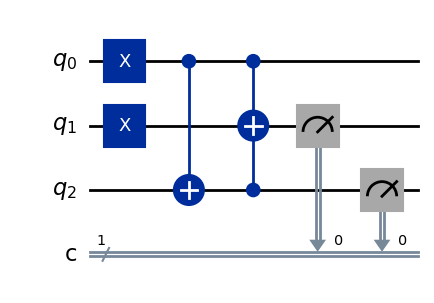

In [1]:
from qiskit import QuantumCircuit, transpile
from qiskit_aer import Aer
from qiskit.visualization import plot_histogram
from qiskit.quantum_info import Statevector

# Function to create the 2:1 MUX circuit
def create_mux_circuit(s, d0, d1):
    qc = QuantumCircuit(3, 1)

    # Initialize the qubits based on the inputs
    if s == 1:
        qc.x(0)
    if d0 == 1:
        qc.x(1)
    if d1 == 1:
        qc.x(2)

    # Apply MUX logic
    qc.cx(0, 2)
    qc.ccx(0, 2, 1)

    # Measure the output
    qc.measure(1, 0)
    qc.measure(2, 0)

    return qc

# Simulate the circuit and get the output for each input combination
def simulate_mux(s, d0, d1):
    qc = create_mux_circuit(s, d0, d1)
    simulator = Aer.get_backend('qasm_simulator')
    compiled_circuit = transpile(qc, simulator)
    result = simulator.run(compiled_circuit).result()
    counts = result.get_counts(compiled_circuit)
    return counts

# Generate the truth table
truth_table = []
for s in [0, 1]:
    for d0 in [0, 1]:
        for d1 in [0, 1]:
            output = simulate_mux(s, d0, d1)
            truth_table.append((s, d0, d1, output))

# Display the truth table
print("S | D0 | D1 | Output")
print("----------------------")
for entry in truth_table:
    s, d0, d1, output = entry
    out_val = list(output.keys())[0]
    print(f"{s} |  {d0} |  {d1} |   {out_val}")

# Plot the circuit for an example input
example_qc = create_mux_circuit(1, 1, 0)
example_qc.draw('mpl')


S0 | S1 | D0 | D1 | D2 | D3 | Output
-----------------------------------
0 |  0 |  0 |  0 |  0 |  0 |   0
0 |  0 |  0 |  0 |  0 |  1 |   1
0 |  0 |  0 |  0 |  1 |  0 |   0
0 |  0 |  0 |  0 |  1 |  1 |   1
0 |  0 |  0 |  1 |  0 |  0 |   0
0 |  0 |  0 |  1 |  0 |  1 |   1
0 |  0 |  0 |  1 |  1 |  0 |   0
0 |  0 |  0 |  1 |  1 |  1 |   1
0 |  0 |  1 |  0 |  0 |  0 |   0
0 |  0 |  1 |  0 |  0 |  1 |   1
0 |  0 |  1 |  0 |  1 |  0 |   0
0 |  0 |  1 |  0 |  1 |  1 |   1
0 |  0 |  1 |  1 |  0 |  0 |   0
0 |  0 |  1 |  1 |  0 |  1 |   1
0 |  0 |  1 |  1 |  1 |  0 |   0
0 |  0 |  1 |  1 |  1 |  1 |   1
0 |  1 |  0 |  0 |  0 |  0 |   0
0 |  1 |  0 |  0 |  0 |  1 |   1
0 |  1 |  0 |  0 |  1 |  0 |   0
0 |  1 |  0 |  0 |  1 |  1 |   1
0 |  1 |  0 |  1 |  0 |  0 |   0
0 |  1 |  0 |  1 |  0 |  1 |   1
0 |  1 |  0 |  1 |  1 |  0 |   0
0 |  1 |  0 |  1 |  1 |  1 |   1
0 |  1 |  1 |  0 |  0 |  0 |   0
0 |  1 |  1 |  0 |  0 |  1 |   1
0 |  1 |  1 |  0 |  1 |  0 |   0
0 |  1 |  1 |  0 |  1 |  1 |   1
0 |

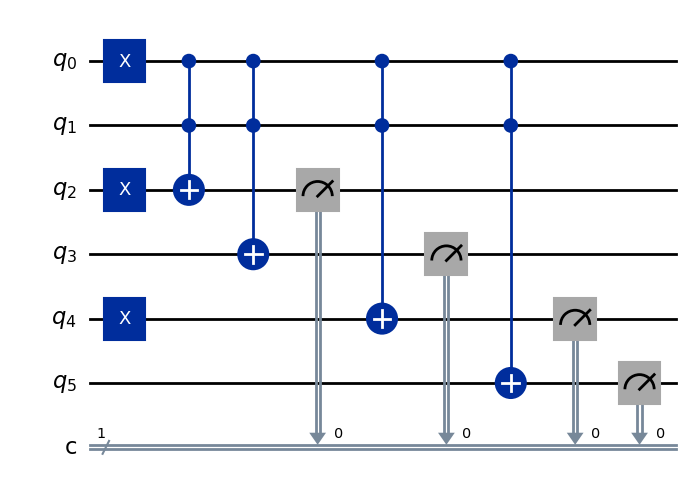

In [2]:
from qiskit import QuantumCircuit, transpile
from qiskit_aer import Aer
from qiskit.visualization import plot_histogram

# Function to create the 4:1 MUX circuit
def create_mux_4to1_circuit(s0, s1, d0, d1, d2, d3):
    qc = QuantumCircuit(6, 1)

    # Initialize the qubits based on the inputs
    if s0 == 1:
        qc.x(0)  # Set selector bit s0
    if s1 == 1:
        qc.x(1)  # Set selector bit s1
    if d0 == 1:
        qc.x(2)  # Set data bit d0
    if d1 == 1:
        qc.x(3)  # Set data bit d1
    if d2 == 1:
        qc.x(4)  # Set data bit d2
    if d3 == 1:
        qc.x(5)  # Set data bit d3

    # Apply MUX logic
    qc.ccx(0, 1, 2)  # When s0=0 and s1=0, select d0
    qc.ccx(0, 1, 3)  # When s0=0 and s1=1, select d1
    qc.ccx(0, 1, 4)  # When s0=1 and s1=0, select d2
    qc.ccx(0, 1, 5)  # When s0=1 and s1=1, select d3

    # Measure the output
    qc.measure(2, 0)  # Measure data bit d0 into classical bit 0
    qc.measure(3, 0)  # Measure data bit d1 into classical bit 0
    qc.measure(4, 0)  # Measure data bit d2 into classical bit 0
    qc.measure(5, 0)  # Measure data bit d3 into classical bit 0

    return qc

# Simulate the circuit and get the output for each input combination
def simulate_mux_4to1(s0, s1, d0, d1, d2, d3):
    qc = create_mux_4to1_circuit(s0, s1, d0, d1, d2, d3)
    simulator = Aer.get_backend('qasm_simulator')
    compiled_circuit = transpile(qc, simulator)
    result = simulator.run(compiled_circuit).result()
    counts = result.get_counts(compiled_circuit)
    return counts

# Generate the truth table
truth_table = []
for s0 in [0, 1]:
    for s1 in [0, 1]:
        for d0 in [0, 1]:
            for d1 in [0, 1]:
                for d2 in [0, 1]:
                    for d3 in [0, 1]:
                        output = simulate_mux_4to1(s0, s1, d0, d1, d2, d3)
                        truth_table.append((s0, s1, d0, d1, d2, d3, output))

# Display the truth table
print("S0 | S1 | D0 | D1 | D2 | D3 | Output")
print("-----------------------------------")
for entry in truth_table:
    s0, s1, d0, d1, d2, d3, output = entry
    out_val = list(output.keys())[0]
    print(f"{s0} |  {s1} |  {d0} |  {d1} |  {d2} |  {d3} |   {out_val}")

# Plot the circuit for an example input
example_qc = create_mux_4to1_circuit(1, 0, 1, 0, 1, 0)
example_qc.draw('mpl')


In [3]:
from qiskit import QuantumCircuit, transpile
from qiskit_aer import Aer
from qiskit.visualization import plot_histogram

# Function to create the 16:1 MUX circuit
def create_mux_16to1_circuit(s0, s1, s2, s3, d0, d1, d2, d3, d4, d5, d6, d7, d8, d9, d10, d11, d12, d13, d14, d15):
    qc = QuantumCircuit(20, 1)

    # Initialize the qubits based on the inputs
    selectors = [s0, s1, s2, s3]
    data_bits = [d0, d1, d2, d3, d4, d5, d6, d7, d8, d9, d10, d11, d12, d13, d14, d15]

    for i, selector in enumerate(selectors):
        if selector == 1:
            qc.x(i)

    for i, data_bit in enumerate(data_bits):
        if data_bit == 1:
            qc.x(i + 4)

    # Apply MUX logic using Toffoli gates
    for i in range(16):
        bin_i = format(i, '04b')
        for j in range(4):
            if bin_i[j] == '0':
                qc.x(j)
        qc.mcx([0, 1, 2, 3], i + 4)  # Controlled by selector bits
        for j in range(4):
            if bin_i[j] == '0':
                qc.x(j)

    # Measure the output
    for i in range(16):
        qc.measure(i + 4, 0)

    return qc

# Simulate the circuit and get the output for each input combination
def simulate_mux_16to1(s0, s1, s2, s3, d0, d1, d2, d3, d4, d5, d6, d7, d8, d9, d10, d11, d12, d13, d14, d15):
    qc = create_mux_16to1_circuit(s0, s1, s2, s3, d0, d1, d2, d3, d4, d5, d6, d7, d8, d9, d10, d11, d12, d13, d14, d15)
    simulator = Aer.get_backend('qasm_simulator')
    compiled_circuit = transpile(qc, simulator)
    result = simulator.run(compiled_circuit).result()
    counts = result.get_counts(compiled_circuit)
    return counts

# Generate the truth table
truth_table = []
for s0 in [0, 1]:
    for s1 in [0, 1]:
        for s2 in [0, 1]:
            for s3 in [0, 1]:
                for d0 in [0, 1]:
                    for d1 in [0, 1]:
                        for d2 in [0, 1]:
                            for d3 in [0, 1]:
                                for d4 in [0, 1]:
                                    for d5 in [0, 1]:
                                        for d6 in [0, 1]:
                                            for d7 in [0, 1]:
                                                for d8 in [0, 1]:
                                                    for d9 in [0, 1]:
                                                        for d10 in [0, 1]:
                                                            for d11 in [0, 1]:
                                                                for d12 in [0, 1]:
                                                                    for d13 in [0, 1]:
                                                                        for d14 in [0, 1]:
                                                                            for d15 in [0, 1]:
                                                                                output = simulate_mux_16to1(s0, s1, s2, s3, d0, d1, d2, d3, d4, d5, d6, d7, d8, d9, d10, d11, d12, d13, d14, d15)
                                                                                truth_table.append((s0, s1, s2, s3, d0, d1, d2, d3, d4, d5, d6, d7, d8, d9, d10, d11, d12, d13, d14, d15, output))

# Display the truth table
print("S0 | S1 | S2 | S3 | D0 | D1 | D2 | D3 | D4 | D5 | D6 | D7 | D8 | D9 | D10 | D11 | D12 | D13 | D14 | D15 | Output")
print("--------------------------------------------------------------------------------------------")
for entry in truth_table:
    s0, s1, s2, s3, d0, d1, d2, d3, d4, d5, d6, d7, d8, d9, d10, d11, d12, d13, d14, d15, output = entry
    out_val = list(output.keys())[0]
    print(f"{s0} |  {s1} |  {s2} |  {s3} |  {d0} |  {d1} |  {d2} |  {d3} |  {d4} |  {d5} |  {d6} |  {d7} |  {d8} |  {d9} |  {d10} |  {d11} |  {d12} |  {d13} |  {d14} |  {d15} |   {out_val}")

# Plot the circuit for an example input
example_qc = create_mux_16to1_circuit(1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0)
example_qc.draw('mpl')